<a href="https://colab.research.google.com/github/HoDinhKhanh/AI/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
from keras.datasets import cifar10
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [120]:
x_train.shape

(50000, 32, 32, 3)

In [121]:
y_train.shape

(50000, 1)

In [122]:
x_test.shape

(10000, 32, 32, 3)

In [123]:
y_test.shape

(10000, 1)

Hinh1 [8]


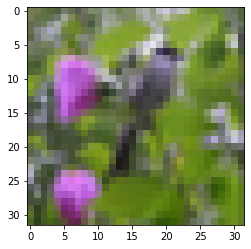

In [124]:
import matplotlib.pyplot as plt
hinh = x_train[300]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print('Hinh1', y_train[100])

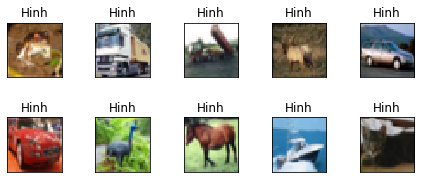

In [125]:
import matplotlib.pyplot as plt
for i in range(10):
  plt.subplot(3,5, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation = 'none')
  plt.title('Hinh'.format(y_train[i]))

  plt.xticks([])
  plt.yticks([])

In [126]:
from keras.models import Sequential
from keras.layers import Dense

model= Sequential()
model.add(Dense(512, input_shape = (32*32*3,), activation = 'relu'))
model.add(Dense(10,activation= 'softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               1573376   
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [127]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [128]:
from keras.utils import to_categorical #Lệnh chuyển qua 

y_train = to_categorical(y_train, 10) #chuyển sang 10 kênh
y_test = to_categorical(y_test, 10)

In [129]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 10, batch_size= 128) # Mỗi lần học chỉ 128 dữ liệu, không học hết 60000 dữ liệu , học tổng cộng 10 lầnlần
test_loss, test_acc = model.evaluate(x_test,y_test)
print('test_accuracy:',test_acc)
print('test_loss:',test_loss)

Epoch 1/10
391/391 [==============================] - 11s 28ms/step - loss: 2.3368 - accuracy: 0.2587
Epoch 2/10
391/391 [==============================] - 11s 28ms/step - loss: 1.8024 - accuracy: 0.3591
Epoch 3/10
391/391 [==============================] - 11s 28ms/step - loss: 1.7152 - accuracy: 0.3903
Epoch 4/10
391/391 [==============================] - 11s 28ms/step - loss: 1.6577 - accuracy: 0.4107
Epoch 5/10
391/391 [==============================] - 11s 28ms/step - loss: 1.6154 - accuracy: 0.4269
Epoch 6/10
391/391 [==============================] - 10s 25ms/step - loss: 1.5843 - accuracy: 0.4393
Epoch 7/10
391/391 [==============================] - 11s 28ms/step - loss: 1.5568 - accuracy: 0.4477
Epoch 8/10
391/391 [==============================] - 11s 28ms/step - loss: 1.5339 - accuracy: 0.4553
Epoch 9/10
391/391 [==============================] - 11s 28ms/step - loss: 1.5132 - accuracy: 0.4648
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 1.5640 

1/1 [==============================] - 0s 33ms/step


array([5])

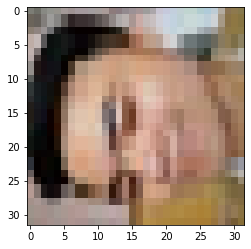

In [132]:
from keras.utils import load_img
import matplotlib.pyplot as plt

img = load_img('20230326_105338.jpg',target_size=(32,32))
plt.imshow(img)

import numpy as np
from keras.utils.image_utils import img_to_array
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis=-1)